#### Import packages

In [31]:
import sqlite3
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import random
import prettytable
prettytable.DEFAULT = 'DEFAULT'

import warnings
warnings.filterwarnings('ignore')
%load_ext sql
# Set up plotting
plt.style.use('seaborn-v0_8')

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


####  Create Sample Database

Setting up the database structure with five related tables to simulate an e-commerce system. Each table has specific data types and relationships.

In [32]:
# Create connection to SQLite database
conn = sqlite3.connect('ecommerce.db')

# Create SQLite database
%sql sqlite:///ecommerce.db


In [34]:
%%sql
-- Create Customers table
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    email VARCHAR(100),
    phone VARCHAR(20),
    city VARCHAR(50),
    state VARCHAR(50),
    country VARCHAR(50),
    registration_date DATE,
    age INTEGER
);

-- Create Categories table
CREATE TABLE IF NOT EXISTS categories (
    category_id INTEGER PRIMARY KEY,
    category_name VARCHAR(50),
    description TEXT
);

-- Create Products table
CREATE TABLE IF NOT EXISTS products (
    product_id INTEGER PRIMARY KEY,
    product_name VARCHAR(100),
    category_id INTEGER,
    price DECIMAL(10,2),
    cost DECIMAL(10,2),
    stock_quantity INTEGER,
    supplier VARCHAR(50),
    FOREIGN KEY (category_id) REFERENCES categories(category_id)
);

-- Create Orders table
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    order_date DATE,
    total_amount DECIMAL(10,2),
    status VARCHAR(20),
    shipping_address TEXT,
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
);

-- Create Order Items table
CREATE TABLE IF NOT EXISTS order_items (
    order_item_id INTEGER PRIMARY KEY,
    order_id INTEGER,
    product_id INTEGER,
    quantity INTEGER,
    unit_price DECIMAL(10,2),
    FOREIGN KEY (order_id) REFERENCES orders(order_id),
    FOREIGN KEY (product_id) REFERENCES products(product_id)
);

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.
Done.
Done.
Done.
Done.


[]

### Data Population

Populating our empty database tables with realistic sample data to simulate a real e-commerce business scenario.

In [35]:
# Sample data for categories
categories_data = [
    (1, 'Electronics', 'Electronic devices and accessories'),
    (2, 'Clothing', 'Apparel and fashion items'),
    (3, 'Books', 'Books and educational materials'),
    (4, 'Home & Garden', 'Home improvement and garden supplies'),
    (5, 'Sports', 'Sports equipment and accessories')
]

# Insert categories
for cat in categories_data:
    %sql INSERT OR IGNORE INTO categories VALUES {cat}

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
1 rows affected.
   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
1 rows affected.
   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
1 rows affected.
   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
1 rows affected.
   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
1 rows affected.


In [48]:
%%sql
-- Insert sample customers
INSERT OR IGNORE INTO customers VALUES
(1, 'John', 'Smith', 'john.smith@email.com', '555-0101', 'New York', 'NY', 'USA', '2023-01-15', 28),
(2, 'Jane', 'Doe', 'jane.doe@email.com', '555-0102', 'Los Angeles', 'CA', 'USA', '2023-02-20', 34),
(3, 'Mike', 'Johnson', 'mike.j@email.com', '555-0103', 'Chicago', 'IL', 'USA', '2023-03-10', 41),
(4, 'Sarah', 'Wilson', 'sarah.w@email.com', '555-0104', 'Houston', 'TX', 'USA', '2023-01-25', 29),
(5, 'David', 'Brown', 'david.b@email.com', '555-0105', 'Phoenix', 'AZ', 'USA', '2023-04-05', 36);

-- Insert sample products
INSERT OR IGNORE INTO products VALUES
(1, 'iPhone 14', 1, 999.99, 700.00, 50, 'Apple Inc'),
(2, 'Samsung Galaxy S23', 1, 899.99, 650.00, 45, 'Samsung'),
(3, 'Nike Air Max', 2, 129.99, 80.00, 100, 'Nike'),
(4, 'Levi Jeans', 2, 79.99, 40.00, 75, 'Levi Strauss'),
(5, 'Python Programming Book', 3, 49.99, 25.00, 30, 'Tech Books Inc'),
(6, 'Garden Hose', 4, 39.99, 20.00, 25, 'Garden Tools Co'),
(7, 'Tennis Racket', 5, 159.99, 90.00, 20, 'SportsTech');

-- Insert sample orders
INSERT OR IGNORE INTO orders VALUES
(1, 1, '2024-01-15', 1049.98, 'Completed', '123 Main St, New York, NY'),
(2, 2, '2024-01-20', 209.98, 'Completed', '456 Oak Ave, Los Angeles, CA'),
(3, 3, '2024-02-01', 159.99, 'Shipped', '789 Pine St, Chicago, IL'),
(4, 1, '2024-02-15', 79.99, 'Completed', '123 Main St, New York, NY'),
(5, 4, '2024-03-01', 89.98, 'Processing', '321 Elm St, Houston, TX');

-- Insert order items
INSERT OR IGNORE INTO order_items VALUES
(1, 1, 1, 1, 999.99),
(2, 1, 3, 1, 49.99),
(3, 2, 3, 1, 129.99),
(4, 2, 4, 1, 79.99),
(5, 3, 7, 1, 159.99),
(6, 4, 4, 1, 79.99),
(7, 5, 5, 1, 49.99),
(8, 5, 6, 1, 39.99);

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
0 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.


[]

### Basic SQL Queries

In [49]:
%%sql
-- Basic SELECT with all columns
SELECT * FROM customers LIMIT 5;

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


customer_id,first_name,last_name,email,phone,city,state,country,registration_date,age
1,John,Smith,john.smith@email.com,555-0101,New York,NY,USA,2023-01-15,28
2,Jane,Doe,jane.doe@email.com,555-0102,Los Angeles,CA,USA,2023-02-20,34
3,Mike,Johnson,mike.j@email.com,555-0103,Chicago,IL,USA,2023-03-10,41
4,Sarah,Wilson,sarah.w@email.com,555-0104,Houston,TX,USA,2023-01-25,29
5,David,Brown,david.b@email.com,555-0105,Phoenix,AZ,USA,2023-04-05,36


In [50]:
%%sql
-- SELECT specific columns
SELECT first_name, last_name, email, city 
FROM customers;

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


first_name,last_name,email,city
John,Smith,john.smith@email.com,New York
Jane,Doe,jane.doe@email.com,Los Angeles
Mike,Johnson,mike.j@email.com,Chicago
Sarah,Wilson,sarah.w@email.com,Houston
David,Brown,david.b@email.com,Phoenix


In [55]:
%%sql
-- SELECT with WHERE clause
SELECT product_name, price 
FROM products 
WHERE price > 100;

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


product_name,price
iPhone 14,999.99
Samsung Galaxy S23,899.99
Nike Air Max,129.99
Tennis Racket,159.99


In [56]:
%%sql
-- SELECT with ORDER BY
SELECT product_name, price 
FROM products 
ORDER BY price DESC; 

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


product_name,price
iPhone 14,999.99
Samsung Galaxy S23,899.99
Tennis Racket,159.99
Nike Air Max,129.99
Levi Jeans,79.99
Python Programming Book,49.99
Garden Hose,39.99


#### Using advanced filtering techniques to find specific data based on multiple criteria.

In [57]:
%%sql
-- Multiple conditions with AND/OR
SELECT * FROM customers 
WHERE age > 30 AND state IN ('CA', 'NY', 'TX');


   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


customer_id,first_name,last_name,email,phone,city,state,country,registration_date,age
2,Jane,Doe,jane.doe@email.com,555-0102,Los Angeles,CA,USA,2023-02-20,34


In [58]:
%%sql
-- LIKE operator for pattern matching
SELECT * FROM customers 
WHERE email LIKE '%@email.com';

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


customer_id,first_name,last_name,email,phone,city,state,country,registration_date,age
1,John,Smith,john.smith@email.com,555-0101,New York,NY,USA,2023-01-15,28
2,Jane,Doe,jane.doe@email.com,555-0102,Los Angeles,CA,USA,2023-02-20,34
3,Mike,Johnson,mike.j@email.com,555-0103,Chicago,IL,USA,2023-03-10,41
4,Sarah,Wilson,sarah.w@email.com,555-0104,Houston,TX,USA,2023-01-25,29
5,David,Brown,david.b@email.com,555-0105,Phoenix,AZ,USA,2023-04-05,36


In [59]:
%%sql
-- BETWEEN operator

SELECT product_name, price 
FROM products 
WHERE price BETWEEN 50 AND 200;

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


product_name,price
Nike Air Max,129.99
Levi Jeans,79.99
Tennis Racket,159.99


Using mathematical functions to summarize and analyze our data - key for business reporting.

In [60]:
%%sql
-- COUNT, AVG, MIN, MAX, SUM

SELECT 
    COUNT(*) as total_products,              -- How many products do we sell?
    AVG(price) as avg_price,                 -- What's our average product price?
    MIN(price) as min_price,                 -- What's our cheapest product?
    MAX(price) as max_price,                 -- What's our most expensive product?
    SUM(stock_quantity) as total_stock       -- How many total units do we have?
FROM products;

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


total_products,avg_price,min_price,max_price,total_stock
7,337.1328571428571,39.99,999.99,345


Breaking down data into groups to analyze patterns and trends within categories.

In [61]:
%%sql
-- Group by category

SELECT 
    c.category_name,                         -- Group identifier
    COUNT(p.product_id) as product_count,    -- How many products in each category?
    AVG(p.price) as avg_price,               -- Whats the average price per category?
    SUM(p.stock_quantity) as total_stock     -- How much inventory per category?
FROM products p
JOIN categories c ON p.category_id = c.category_id    -- Connect products to their categories
GROUP BY c.category_name                     -- Create separate calculations for each category
HAVING COUNT(p.product_id) > 0             -- HAVING filters groups (vs WHERE filters rows)
ORDER BY avg_price DESC;  

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


category_name,product_count,avg_price,total_stock
Electronics,2,949.99,95
Sports,1,159.99,20
Clothing,2,104.99000000000001,175
Books,1,49.99,30
Home & Garden,1,39.99,25


In [62]:
%%sql
-- Customer order statistics

SELECT 
    c.first_name || ' ' || c.last_name as customer_name,  -- Concatenate first and last name
    COUNT(o.order_id) as total_orders,                    -- How many orders per customer?
    SUM(o.total_amount) as total_spent,                   -- Total money spent per customer
    AVG(o.total_amount) as avg_order_value                -- Average order size per customer
FROM customers c
LEFT JOIN orders o ON c.customer_id = o.customer_id      -- LEFT JOIN includes all customers
GROUP BY c.customer_id, customer_name                     -- Group by each customer
ORDER BY total_spent DESC;   

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


customer_name,total_orders,total_spent,avg_order_value
John Smith,2,1129.97,564.985
Jane Doe,1,209.98,209.98
Mike Johnson,1,159.99,159.99
Sarah Wilson,1,89.98,89.98
David Brown,0,None,None


Connecting multiple tables to create comprehensive business reports that show relationships across our entire database.

In [63]:
%%sql
-- Multiple table JOIN with detailed order information

SELECT 
    o.order_id,                                           -- Order reference number
    c.first_name || ' ' || c.last_name as customer_name,  -- Who placed the order?
    c.email,                                              -- Customer contact info
    o.order_date,                                         -- When was it ordered?
    p.product_name,                                       -- What products were ordered?
    cat.category_name,                                    -- What category is each product in?
    oi.quantity,                                          -- How many of each product?
    oi.unit_price,                                        -- Price per unit at time of purchase
    (oi.quantity * oi.unit_price) as line_total           -- Total for this product line
FROM orders o                                             -- Start with orders table
JOIN customers c ON o.customer_id = c.customer_id         -- Add customer details
JOIN order_items oi ON o.order_id = oi.order_id          -- Add individual products in order
JOIN products p ON oi.product_id = p.product_id          -- Add product details
JOIN categories cat ON p.category_id = cat.category_id   -- Add category information
ORDER BY o.order_date DESC, o.order_id; 

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


order_id,customer_name,email,order_date,product_name,category_name,quantity,unit_price,line_total
5,Sarah Wilson,sarah.w@email.com,2024-03-01,Python Programming Book,Books,1,49.99,49.99
5,Sarah Wilson,sarah.w@email.com,2024-03-01,Garden Hose,Home & Garden,1,39.99,39.99
4,John Smith,john.smith@email.com,2024-02-15,Levi Jeans,Clothing,1,79.99,79.99
3,Mike Johnson,mike.j@email.com,2024-02-01,Tennis Racket,Sports,1,159.99,159.99
2,Jane Doe,jane.doe@email.com,2024-01-20,Nike Air Max,Clothing,1,129.99,129.99
2,Jane Doe,jane.doe@email.com,2024-01-20,Levi Jeans,Clothing,1,79.99,79.99
1,John Smith,john.smith@email.com,2024-01-15,iPhone 14,Electronics,1,999.99,999.99
1,John Smith,john.smith@email.com,2024-01-15,Nike Air Max,Clothing,1,49.99,49.99


In [66]:
%%sql
-- Customers who spent more than average
-- Purpose: Identify high-value customers who spend above the average customer spending
SELECT 
    c.first_name || ' ' || c.last_name as customer_name,
    total_spent
FROM (
    -- Inner subquery: Calculate total spending per customer
    SELECT 
        c.customer_id,
        c.first_name,
        c.last_name,
        COALESCE(SUM(o.total_amount), 0) as total_spent    -- COALESCE handles customers with no orders
    FROM customers c
    LEFT JOIN orders o ON c.customer_id = o.customer_id   -- Include all customers
    GROUP BY c.customer_id, c.first_name, c.last_name     -- Group by each customer
) customer_totals                                          -- Alias for the subquery result
JOIN customers c ON customer_totals.customer_id = c.customer_id
WHERE total_spent > (
    -- Nested subquery: Calculate the average customer spending
    SELECT AVG(customer_total)
    FROM (
        SELECT COALESCE(SUM(total_amount), 0) as customer_total
        FROM customers c2
        LEFT JOIN orders o2 ON c2.customer_id = o2.customer_id
        GROUP BY c2.customer_id
    )
);


   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


customer_name,total_spent
John Smith,1129.97


In [67]:
%%sql
-- Product ranking by price within categories
SELECT 
    p.product_name,
    c.category_name,
    p.price,
    RANK() OVER (PARTITION BY c.category_name ORDER BY p.price DESC) as price_rank,
    DENSE_RANK() OVER (PARTITION BY c.category_name ORDER BY p.price DESC) as dense_price_rank,
    ROW_NUMBER() OVER (PARTITION BY c.category_name ORDER BY p.price DESC) as row_num
FROM products p
JOIN categories c ON p.category_id = c.category_id
ORDER BY c.category_name, p.price DESC;

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


product_name,category_name,price,price_rank,dense_price_rank,row_num
Python Programming Book,Books,49.99,1,1,1
Nike Air Max,Clothing,129.99,1,1,1
Levi Jeans,Clothing,79.99,2,2,2
iPhone 14,Electronics,999.99,1,1,1
Samsung Galaxy S23,Electronics,899.99,2,2,2
Garden Hose,Home & Garden,39.99,1,1,1
Tennis Racket,Sports,159.99,1,1,1


In [68]:
%%sql
-- Running total of orders by date
SELECT 
    order_date,
    total_amount,
    SUM(total_amount) OVER (ORDER BY order_date ROWS UNBOUNDED PRECEDING) as running_total,
    AVG(total_amount) OVER (ORDER BY order_date ROWS 2 PRECEDING) as moving_avg_3
FROM orders
ORDER BY order_date;

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


order_date,total_amount,running_total,moving_avg_3
2024-01-15,1049.98,1049.98,1049.98
2024-01-20,209.98,1259.96,629.98
2024-02-01,159.99,1419.95,473.31666666666666
2024-02-15,79.99,1499.94,149.98666666666665
2024-03-01,89.98,1589.92,109.98666666666668


### Product Performance Analysis

In [69]:
%%sql
-- Product performance with profit margins
SELECT 
    p.product_name,
    c.category_name,
    p.price,
    p.cost,
    (p.price - p.cost) as profit_per_unit,
    ROUND(((p.price - p.cost) * 100.0 / p.price), 2) as profit_margin_pct,
    COALESCE(SUM(oi.quantity), 0) as total_sold,
    COALESCE(SUM(oi.quantity * (p.price - p.cost)), 0) as total_profit,
    p.stock_quantity as current_stock
FROM products p
JOIN categories c ON p.category_id = c.category_id
LEFT JOIN order_items oi ON p.product_id = oi.product_id
GROUP BY p.product_id, p.product_name, c.category_name, p.price, p.cost, p.stock_quantity
ORDER BY total_profit DESC;

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


product_name,category_name,price,cost,profit_per_unit,profit_margin_pct,total_sold,total_profit,current_stock
iPhone 14,Electronics,999.99,700,299.99,30.0,1,299.99,50
Nike Air Max,Clothing,129.99,80,49.99000000000001,38.46,2,99.98000000000002,100
Levi Jeans,Clothing,79.99,40,39.989999999999995,49.99,2,79.97999999999999,75
Tennis Racket,Sports,159.99,90,69.99000000000001,43.75,1,69.99000000000001,20
Python Programming Book,Books,49.99,25,24.990000000000002,49.99,1,24.990000000000002,30
Garden Hose,Home & Garden,39.99,20,19.990000000000002,49.99,1,19.990000000000002,25
Samsung Galaxy S23,Electronics,899.99,650,249.99,27.78,0,0,45


In [70]:
%%sql
-- Check for data inconsistencies
SELECT 'Customers with invalid emails' as check_type, COUNT(*) as count
FROM customers 
WHERE email NOT LIKE '%@%.%'

UNION ALL

SELECT 'Products with price <= cost', COUNT(*)
FROM products 
WHERE price <= cost

UNION ALL

SELECT 'Orders with zero total', COUNT(*)
FROM orders 
WHERE total_amount <= 0

UNION ALL

SELECT 'Negative stock quantities', COUNT(*)
FROM products 
WHERE stock_quantity < 0;

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


check_type,count
Customers with invalid emails,0
Products with price <= cost,0
Orders with zero total,0
Negative stock quantities,0


### Database Statistics

In [71]:
%%sql
-- Database summary statistics
SELECT 
    'customers' as table_name, COUNT(*) as record_count 
FROM customers
UNION ALL
SELECT 'products', COUNT(*) FROM products
UNION ALL
SELECT 'orders', COUNT(*) FROM orders
UNION ALL
SELECT 'order_items', COUNT(*) FROM order_items
UNION ALL
SELECT 'categories', COUNT(*) FROM categories;

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


table_name,record_count
customers,5
products,7
orders,5
order_items,8
categories,5


   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.
   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.


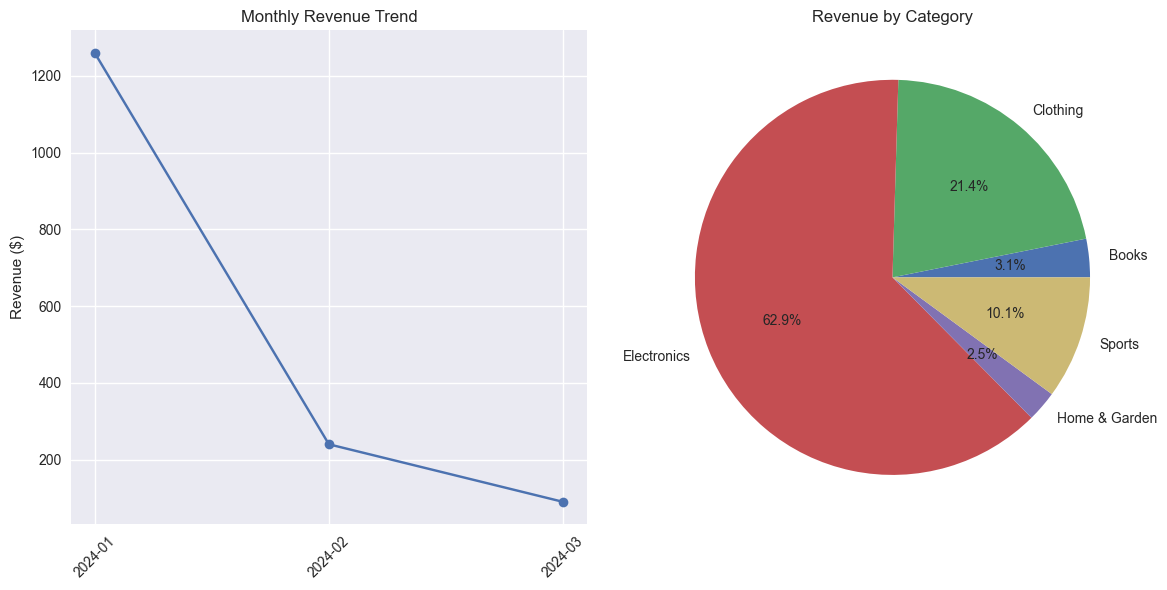

In [72]:
# Query data for visualization
df_sales = %sql SELECT strftime('%Y-%m', order_date) as month, SUM(total_amount) as revenue FROM orders GROUP BY month ORDER BY month

# Convert to pandas DataFrame
df_sales = df_sales.DataFrame()

# Create visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df_sales['month'], df_sales['revenue'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')

# Category performance
df_category = %sql SELECT c.category_name, COUNT(oi.order_item_id) as items_sold, SUM(oi.quantity * oi.unit_price) as revenue FROM categories c JOIN products p ON c.category_id = p.category_id JOIN order_items oi ON p.product_id = oi.product_id GROUP BY c.category_name

df_category = df_category.DataFrame()

plt.subplot(1, 2, 2)
plt.pie(df_category['revenue'], labels=df_category['category_name'], autopct='%1.1f%%')
plt.title('Revenue by Category')

plt.tight_layout()
plt.show()

In [73]:
%%sql
-- Create indexes for better performance
CREATE INDEX IF NOT EXISTS idx_customer_email ON customers(email);
CREATE INDEX IF NOT EXISTS idx_product_category ON products(category_id);
CREATE INDEX IF NOT EXISTS idx_order_customer ON orders(customer_id);
CREATE INDEX IF NOT EXISTS idx_order_date ON orders(order_date);
CREATE INDEX IF NOT EXISTS idx_orderitem_order ON order_items(order_id);
CREATE INDEX IF NOT EXISTS idx_orderitem_product ON order_items(product_id);

   sqlite:///SQLiteMagic.db
 * sqlite:///ecommerce.db
Done.
Done.
Done.
Done.
Done.
Done.


[]